![LogoTec.png](attachment:4d527329-1b6c-4403-abfa-dfe8f39b3635.png)

## Visión Computacional para imágenes y video (Gpo 10)
### Alumnos: 
* Armando Bringas Corpus - A01200230
* Guillermo Alfonso Muñiz Hermosillo - A01793101
* Jorge Luis Arroyo Chavelas - A01793023
* Samantha R Mancias Carrillo - A01196762
* Sofia E Mancias Carrillo - A01196563


### Profesores: 
* Dr. Gilberto Ochoa Ruiz
* Mtra. Yetnalezi Quintas Ruiz

# 6. Otsu Thresholding

## Table of Contents
1. [Libraries](#libraries)
2. [Single Thresholding](#single)
3. [Multi Thresholding](#multi)
4. [Excercises](#excercises)

    a. [Single Thresholding](#singletresh)
    
    b. [Multi Thresholding](#multitresh)
    
    c. [Different Sizes](#sizes)
    
5. [Conclusion](#conclusion)
6. [References](#references)

Thresholding is used to create a binary image from a grayscale image

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [3]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage.filters import threshold_multiotsu
import numpy as np
import cv2

## Single Thresholding <a class="anchor" id="single" ></a>

We illustrate how to apply one of these thresholding algorithms.
Otsu's method [2]_ calculates an "optimal" threshold (marked by a red line in the
histogram below) by maximizing the variance between two classes of pixels,
which are separated by the threshold. Equivalently, this threshold minimizes
the intra-class variance.

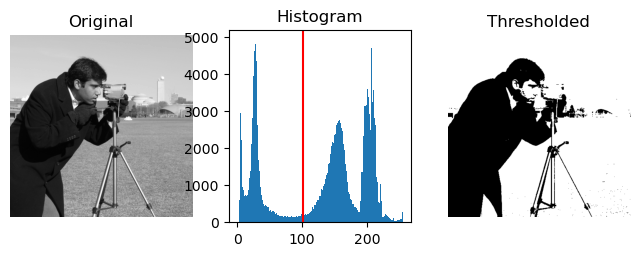

In [2]:
image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

If you are not familiar with the details of the different algorithms and the
underlying assumptions, it is often difficult to know which algorithm will give
the best results. Therefore, Scikit-image includes a function to evaluate
thresholding algorithms provided by the library. At a glance, you can select
the best algorithm for your data without a deep understanding of their
mechanisms.




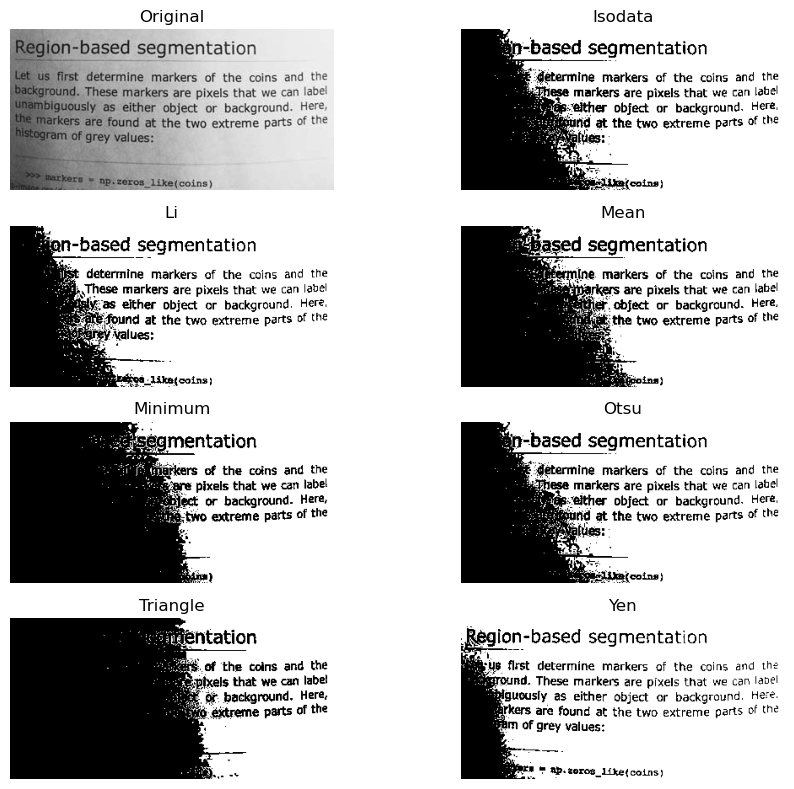

In [3]:
from skimage.filters import try_all_threshold

img = data.page()

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

## Multi Thresholding <a class="anchor" id="multi" ></a>

The multi-Otsu threshold  is a thresholding algorithm that is used to separate
the pixels of an input image into several different classes, each one obtained
according to the intensity of the gray levels within the image.

Multi-Otsu calculates several thresholds, determined by the number of desired
classes. The default number of classes is 3: for obtaining three classes, the
algorithm returns two threshold values. They are represented by a red line in
the histogram below.

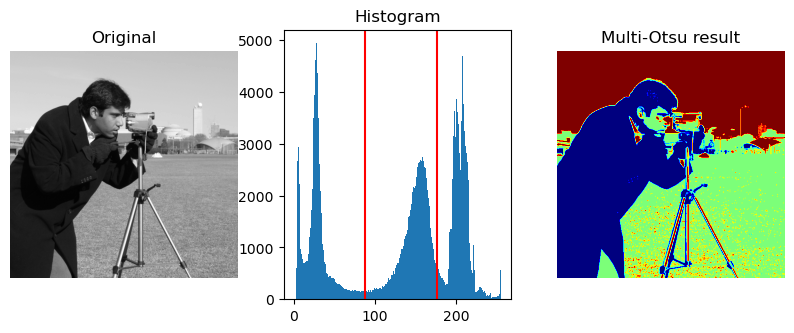

In [4]:
# The input image.
image = data.camera()

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

## Excersises <a class="anchor" id="excercises" ></a>

In this exercise we worked with different images, experimenting with a couple of use cases for the single and multi-thresholding algorithms on different images. 

Single thresholding consists of binarizing an image, usually on black and white and apply detect a threshold where pixel will be separated based on its intensity value. If the value of the pixel is higher than the threshold they will be marked as white else, they will be considered black pixels.

On the other hand, Otsu Multi thresholding it´s a technique which allows us to split the image on multiple regions using multiple thresholds for pixel values.

In our examples we take 3 use cases for image thresholding algorithms: edge detection on object photos, satellite images and medical/lab images. We believe that using these examples will lead us to a better understanding of the algorithms´ functionality. 

In [2]:
# We start by saving the filepaths to our example images into a list.
imgs_toRead = ['data/bunny_5.jpg', 'data/satelite2.jpg', 'data/microscope.jpeg', 'data/lena_noise.jpg']

## Single Tresholding <a class="anchor" id="singletresh" ></a>

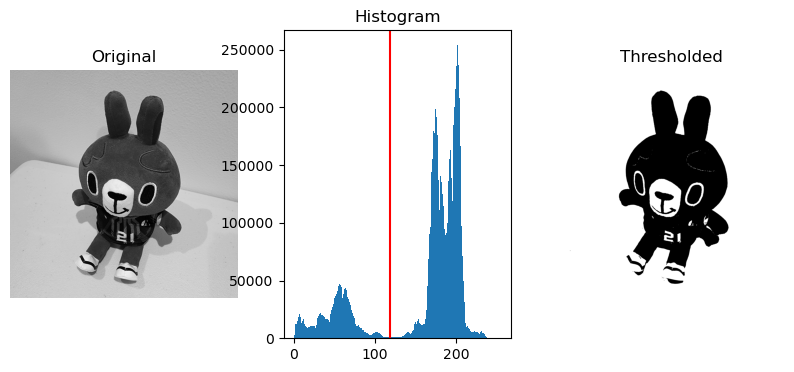

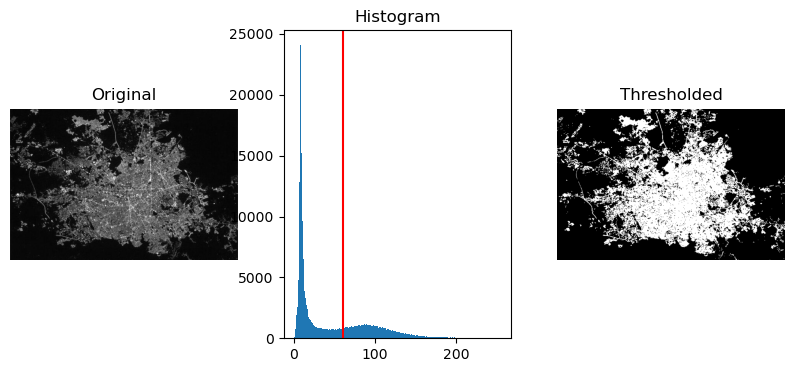

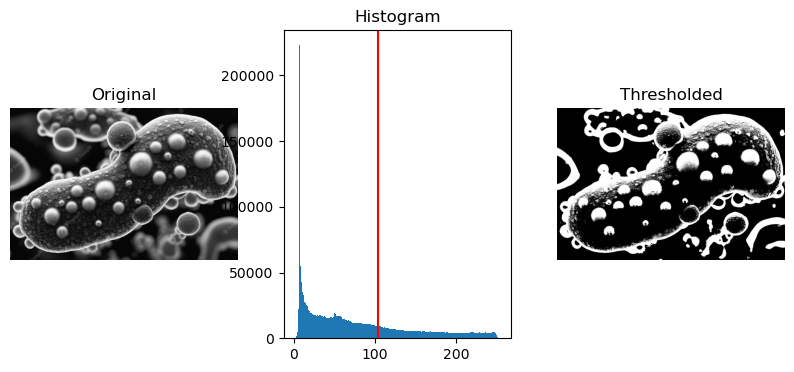

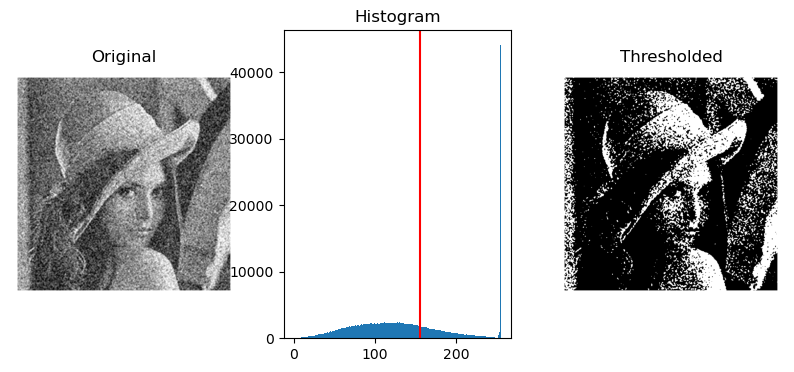

In [28]:
# Then we replicate the single thresholding algorithm into a new function 
# to be able to reuse it as we want by just passing an image as a parameter
def single_tresh(image):
    thresh = threshold_otsu(image)
    binary = image > thresh

    fig, axes = plt.subplots(ncols=3, figsize=(10, 4))
    ax = axes.ravel()
    ax[0] = plt.subplot(1, 3, 1)
    ax[1] = plt.subplot(1, 3, 2)
    ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[0].axis('off')

    ax[1].hist(image.ravel(), bins=256)
    ax[1].set_title('Histogram')
    ax[1].axvline(thresh, color='r')

    ax[2].imshow(binary, cmap=plt.cm.gray)
    ax[2].set_title('Thresholded')
    ax[2].axis('off')

    plt.show()
    
# Using our list of filepaths we import the files and send it to our created function here.
for img in imgs_toRead:
    single_tresh(cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2GRAY))

We can observe how single thresholding although is a simple technique and it doesn’t always provides with the best results for complex image segmentation could provide us with a first preprocessing step in simpler applications.

## Multi Tresholding <a class="anchor" id="multitresh" ></a>

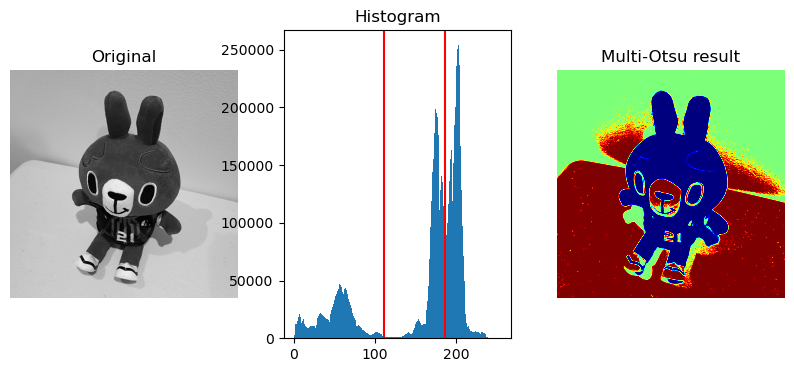

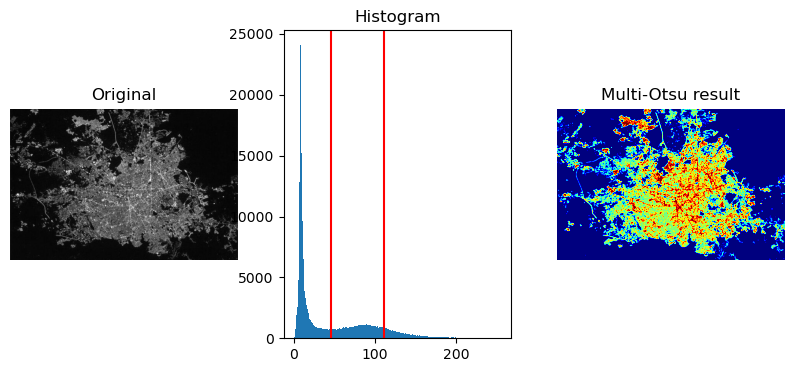

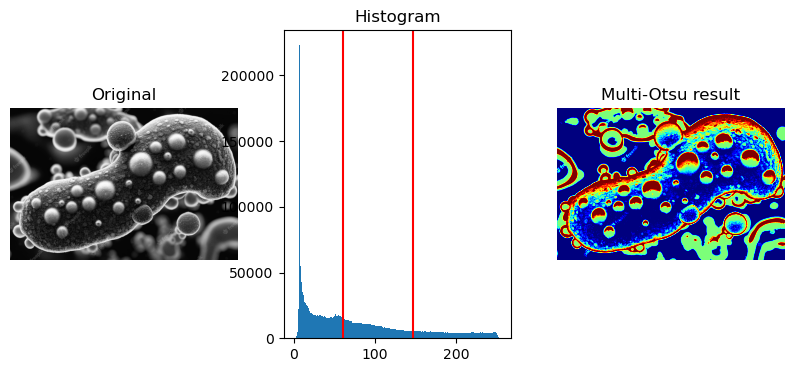

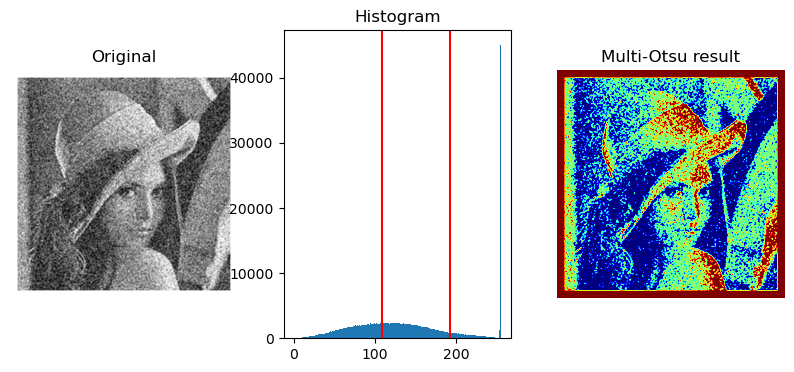

In [29]:
# Then we repeat the process for the multi thresholding algorithm
# Replicating the alogorithm into a new function that will take only an image as a parameter.
def multi_tresh(image):
    thresholds = threshold_multiotsu(image)
    regions = np.digitize(image, bins=thresholds)
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Original')
    ax[0].axis('off')

    ax[1].hist(image.ravel(), bins=255)
    ax[1].set_title('Histogram')
    for thresh in thresholds:
        ax[1].axvline(thresh, color='r')

    ax[2].imshow(regions, cmap='jet')
    ax[2].set_title('Multi-Otsu result')
    ax[2].axis('off')

    plt.subplots_adjust()

    plt.show()
    
for img in imgs_toRead:
    multi_tresh(cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2GRAY))

As we can observe after applying both algorithms the multi-thresholding could be considered a more advanced image processing technique than the simple one. By splitting our images into multiple regions not just one, we are able to detect more objects into an image.

We believe that applying the single thresholding algorithm to an image with 2 clear histogram high points (e.g., the bunny image) can yield better results than the multi thresholding algorithm. However, when there are more complex images, with multiple high histogram values is better to use the later one.

Some of the disadvantages of the single thresholding algorithm against the multi thresholding we could identify are:

- Robustness to light changes in an image, as we see on the satellite image, some details are lost on the single thresholding implementation while on the multi thresholding we can see more details (streets).
- Adaptability to noisy images, as we can see on Lena´s image, the single thresholding algorithm loses some details on the image due to its binary nature.

## Different Size Windows <a class="anchor" id="sizes" ></a>

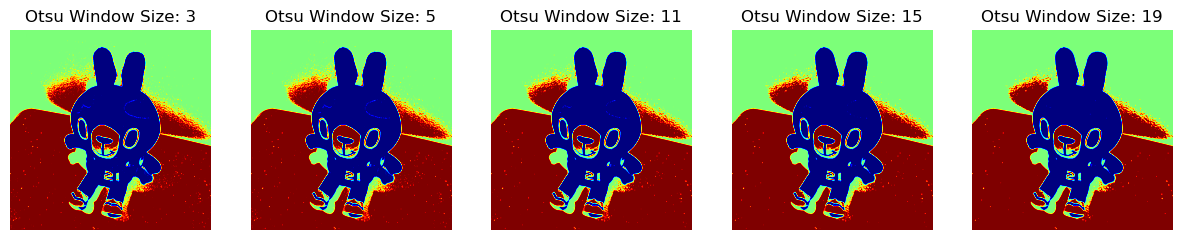

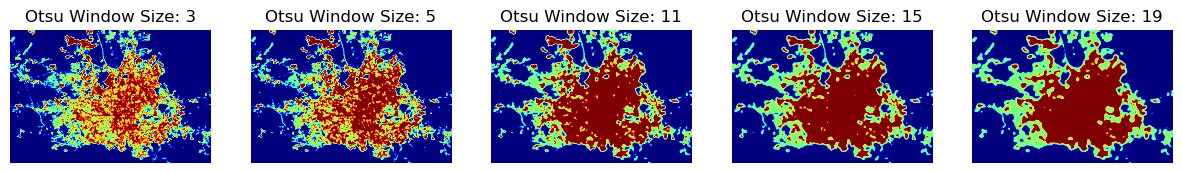

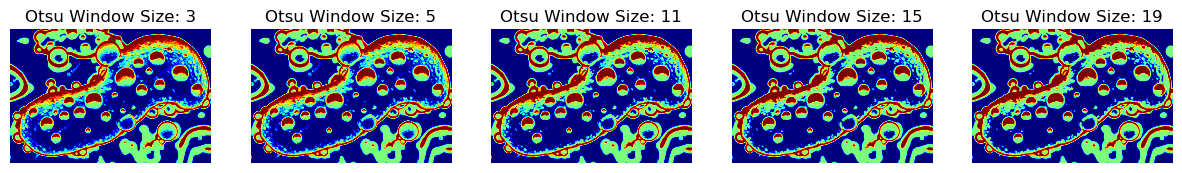

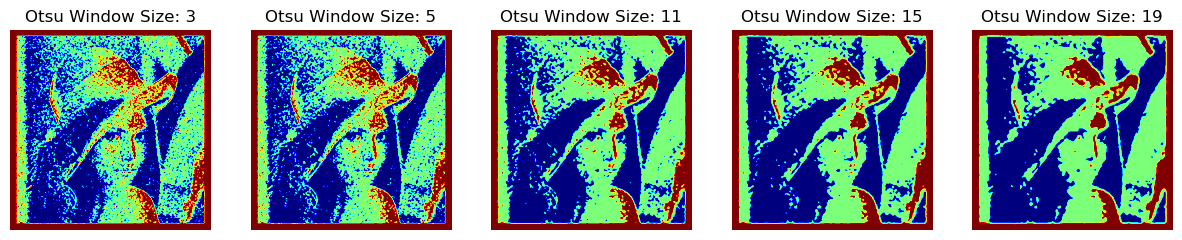

In [25]:
def multipleWIndowSize(image):
    wsizes = [3,5, 11, 15, 19]
    fig, ax = plt.subplots(nrows=1, ncols=len(wsizes), figsize=(15, 6))
    for i, size in enumerate(wsizes):
        gaus_img = cv2.GaussianBlur(image, (size, size), 0)
        thresholds = threshold_multiotsu(gaus_img)
        img_ots = np.digitize(gaus_img, bins=thresholds)
        #img_ots = cv2.adaptiveThreshold(gaus_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

        ax[i].imshow(img_ots,  cmap='jet')
        ax[i].set_title(f'Otsu Window Size: {size}')
        ax[i].axis('off')
    
    plt.subplots_adjust()
    plt.show()

for img in imgs_toRead:
    multipleWIndowSize(cv2.imread(img , 0))

## Conclusion <a class="anchor" id="conclusion" ></a>

Otsu algorithm is a useful thresholding technique that we can leverage to implement image segmentation on grayscale images with regions of interest based on the level of intensity of the pixels contained in the image. By being able to select the optimal threshold to separate such regions and obtained a better result.

On this exercise we learn that the simple thresholding is a fast and easy to implement technique to get familiar with the algorithm, however, it could not be appropriate to implement it on complex images with irregular lightning or noise. On the other hand, the multi-thresholding Otsu technique it´s a more advanced technique that could be useful for the previous issues mentioned on the single thresholding algorithm, although it can be harder and costly to implement.

Last but not least, we observe the implementation of the adaptative thresholding algorithm in which we used different window sizes to smooth the image and then apply the algorithm to obtain the thresholds on this smoothed image, this allowed us to observed different results on the different images we have and we could observe how the textures and the illumination are a key factor to take into consideration when applying a segmentation algorithm.

These techniques are powerful tools that can be used on multiple real-life applications, and it will be up to the developer to decide which technique will adapt best to its needs.

## References <a class="anchor" id="references" ></a>

[1] Gonzalez, R. C., & Woods, R. E. (2018). Digital image processing (Fourth edition.). Pearson.

[2] Senthilkumaranand, N., Vaithegi S. (2016). Image Segmentation by using thresholding techniques for medical images. CSEIJ.

[3] Otsu’s method for image thresholding explained and implemented. Muthu.Co. https://muthu.co/otsus-method-for-image-thresholding-explained-and-implemented/

[4] Wang, Y. (2018). Improved OTSU and adaptive genetic algorithm for infrared image segmentation. 2018 Chinese Control And Decision Conference (CCDC), 5644–5648.
